# Predicting the first round of the 2018 Brazilian elections

We want to predict the probability of winning the election for each party using an aggregate poll model.
The data is taken from wikipedia (https://en.wikipedia.org/wiki/Opinion_polling_for_the_Brazilian_general_election,_2018) and contains the estimation of 31 polls conducted between September 1 to October 5. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bd = pd.read_excel(r"C:\Users\Lluís\Desktop\Projects\Python\Noviembre 2018\BDLM\polling_brazil_data.xlsx")

In [3]:
bd = pd.DataFrame(bd)

In [4]:
bd.sort_values("PSL", ascending=False).head(5)

,Polling firm,Field dates,Sample size,PT,PDT,PSB,REDE,MDB,PODE,PSDB,NOVO,PSL,Not affiliated,Others,Abst/Undecided
0,Instituto Veritá,2–5 October 2018,5208,18.8,8.4,–,1.4,0.8,1.0,4.2,2.9,41.5,_,2.0,19.0
1,CNT/MDA,4–5 October 2018,2002,24.0,9.9,–,2.2,1.6,1.7,5.8,2.3,36.7,_,1.9,13.8
3,Datafolha,3–4 October 2018,19552,22.0,13.0,–,3.0,2.0,2.0,7.0,3.0,36.0,_,2.0,10.0
4,XP/Ipespe,3–4 October 2018,2000,22.0,11.0,–,4.0,2.0,2.0,7.0,3.0,36.0,–,1.0,12.0
8,Ibope,1–2 October 2018,3010,22.0,11.0,–,3.0,2.0,1.0,7.0,2.0,36.0,–,4.0,12.0


# Transforming the field dates

We want to transform the Field dates column into two columns: Field start and Field end. Also, we want to assign a time data format to this columns.

In [5]:
bd["Field start"] = bd["Field dates"]

In [6]:
bd["Field end"] = bd["Field dates"]

In [7]:
start_date = bd["Field start"]
end_date = bd["Field end"]

In [8]:
start_date = start_date.str.replace('October', '10')
start_date = start_date.str.replace('September', '9')
start_date = start_date.str.replace('–[0-9][0-9]', '')
start_date = start_date.str.replace('–[0-9]', '')
start_date.str.strip()
start_date.head(1)

0    2 10 2018
Name: Field start, dtype: object

In [9]:
end_date = end_date.str.replace('October', '10')
end_date = end_date.str.replace('September', '9')
end_date = end_date.str.replace('[0-9][0-9]–', '')
end_date = end_date.str.replace('[0-9]–', '')
end_date.str.strip()
end_date.head(1)

0    5 10 2018
Name: Field end, dtype: object

In [10]:
bd["Field start"] = start_date
bd["Field end"] = end_date

In [11]:
bd["Field start"] = pd.to_datetime(bd["Field start"], dayfirst=True)
bd["Field end"] = pd.to_datetime(bd["Field end"], dayfirst=True)

In [12]:
bd.head()

,Polling firm,Field dates,Sample size,PT,PDT,PSB,REDE,MDB,PODE,PSDB,NOVO,PSL,Not affiliated,Others,Abst/Undecided,Field start,Field end
0,Instituto Veritá,2–5 October 2018,5208,18.8,8.4,–,1.4,0.8,1.0,4.2,2.9,41.5,_,2.0,19.0,2018-10-02,2018-10-05
1,CNT/MDA,4–5 October 2018,2002,24.0,9.9,–,2.2,1.6,1.7,5.8,2.3,36.7,_,1.9,13.8,2018-10-04,2018-10-05
2,DataPoder360,3–4 October 2018,4000,25.0,15.0,–,2.0,3.0,4.0,7.0,2.0,30.0,NaN,5.0,7.0,2018-10-03,2018-10-04
3,Datafolha,3–4 October 2018,19552,22.0,13.0,–,3.0,2.0,2.0,7.0,3.0,36.0,_,2.0,10.0,2018-10-03,2018-10-04
4,XP/Ipespe,3–4 October 2018,2000,22.0,11.0,–,4.0,2.0,2.0,7.0,3.0,36.0,–,1.0,12.0,2018-10-03,2018-10-04


# Plotting the data

Let's explore the data using the mean function in order to select the parties with the highest % of vote in the polls. After that, we would plot the poll data for this parties.

In [13]:
bd.mean()

Sample size       3689.594595
PT                  18.118919
PDT                 11.124324
REDE                 5.551351
MDB                  2.083784
PODE                 2.378378
PSDB                 7.721622
NOVO                 2.948649
PSL                 29.997297
Others               2.110811
Abst/Undecided      18.043243
dtype: float64

Text(0,0.5,'% de voto')

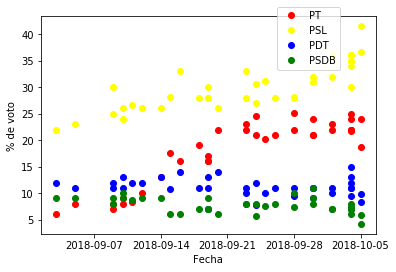

In [14]:
plt.plot_date("Field end", "PT",data=bd, c="red", label='PT')
plt.plot_date("Field end", "PSL", data=bd, c="yellow", label='PSL')
plt.plot_date("Field end", "PDT", data=bd, c="blue", label='PDT')
plt.plot_date("Field end", "PSDB", data=bd, c="green", label='PSDB')
plt.legend(bbox_to_anchor=(0.3, 0.9, 1, 0), loc='center',
           ncol=1, mode="compact", borderaxespad=0)
plt.xlabel('Fecha')
plt.ylabel('% de voto')


# Polling firms

Let's check how many different polling firms we have and what is the mean prediction for every party

In [15]:


pollster = bd['Polling firm'].unique()
pollster

array(['Instituto Veritá', 'CNT/MDA', 'DataPoder360', 'Datafolha',
       'XP/Ipespe', 'RealTime Big Data', 'Paraná Pesquisas/Crusoé',
       'Ibope', 'FSB Pesquisa', 'IstoÉ/Sensus',
       'Genial Investimentos/Brasilis'], dtype=object)

In [16]:
bd.groupby(['Polling firm']).mean()

,Sample size,PT,PDT,REDE,MDB,PODE,PSDB,NOVO,PSL,Others,Abst/Undecided
Polling firm,,,,,,,,,,,
CNT/MDA,2001.333333,22.266667,10.033333,2.966667,1.766667,1.766667,6.400000,2.366667,31.033333,1.533333,19.833333
DataPoder360,4000.000000,23.500000,14.500000,3.000000,3.000000,3.500000,6.500000,1.500000,28.000000,5.000000,11.000000
Datafolha,8135.285714,17.857143,12.142857,6.000000,2.285714,2.428571,8.857143,3.000000,29.857143,2.428571,15.285714
FSB Pesquisa,2000.000000,17.750000,11.250000,5.500000,2.500000,2.250000,8.250000,3.750000,31.750000,1.500000,16.250000
Genial Investimentos/Brasilis,1000.000000,17.000000,7.000000,6.000000,3.000000,4.000000,7.000000,5.000000,30.000000,4.000000,18.000000
Ibope,2505.750000,17.750000,11.125000,6.125000,2.125000,2.000000,7.875000,2.625000,28.750000,1.875000,19.625000
Instituto Veritá,5208.000000,18.800000,8.400000,1.400000,0.800000,1.000000,4.200000,2.900000,41.500000,2.000000,19.000000
IstoÉ/Sensus,2000.000000,24.500000,7.700000,2.700000,1.600000,1.700000,5.600000,1.900000,30.600000,1.300000,22.400000
Paraná Pesquisas/Crusoé,2036.666667,16.766667,10.466667,6.133333,1.800000,2.333333,7.900000,3.400000,30.900000,2.066667,18.233333


# Probability of winning election

At first, we create a new data frame (df) with the most useful columns.
Then, wee simulate 50000 draws from a Dirichlet distribution for each poll. The probability of victory for each party is the number of draws out of the total in which the simulated election is won by the respective party.

For more info, check:

https://github.com/ivandebono/ElectionForecast

In [17]:
cols = bd.columns.tolist()
cols=['Polling firm','Field end','Sample size','PT','PDT','PSDB','PSL']
df=bd[cols]

In [18]:
ProbPT=[]
ProbPDT=[]
ProbPSDB=[]
ProbPSL=[]

In [19]:
dAll=[]
for index, row in df.iterrows(): dAll.append(np.array(row))

In [20]:
number= 50000

for i in range(len(dAll)):
    vector =list(dAll[i][3:7])
    random=np.random.dirichlet(vector,number)
    
    postn=[]
    for i in range(number): postn.append(random[i].argmax(axis=0))
    postn=np.array(postn)
    
    PT=100*len(np.where(postn ==0)[0])/number
    ProbPT.append(PT)
    
    PDT=100*len(np.where(postn ==1)[0])/number
    ProbPDT.append(PDT)
    
    PSDB=100*len(np.where(postn ==2)[0])/number
    ProbPSDB.append(PSDB)
    
    PSL=100*len(np.where(postn ==3)[0])/number
    ProbPSL.append(PSL)
    
#Probability of victory for each party
    setprint=True
    if setprint == True:
        print('PT',PT,'%')
        print('PDT',PDT,'%')
        print('PSDB',PSDB,'%')
        print('PSL',PSL,'%')

PT 0.146 %
PDT 0.0 %
PSDB 0.0 %
PSL 99.854 %
PT 4.866 %
PDT 0.0 %
PSDB 0.0 %
PSL 95.134 %
PT 24.608 %
PDT 0.494 %
PSDB 0.0 %
PSL 74.898 %
PT 3.062 %
PDT 0.026 %
PSDB 0.0 %
PSL 96.912 %
PT 3.006 %
PDT 0.002 %
PSDB 0.0 %
PSL 96.992 %
PT 4.028 %
PDT 0.008 %
PSDB 0.0 %
PSL 95.964 %
PT 9.284 %
PDT 0.02 %
PSDB 0.0 %
PSL 90.696 %
PT 4.044 %
PDT 0.0 %
PSDB 0.0 %
PSL 95.956 %
PT 3.28 %
PDT 0.006 %
PSDB 0.0 %
PSL 96.714 %
PT 10.856 %
PDT 0.012 %
PSDB 0.0 %
PSL 89.132 %
PT 6.542 %
PDT 0.024 %
PSDB 0.004 %
PSL 93.43 %
PT 8.142 %
PDT 0.02 %
PSDB 0.008 %
PSL 91.83 %
PT 16.714 %
PDT 0.004 %
PSDB 0.032 %
PSL 83.25 %
PT 34.094 %
PDT 0.012 %
PSDB 0.0 %
PSL 65.894 %
PT 19.594 %
PDT 0.098 %
PSDB 0.052 %
PSL 80.256 %
PT 15.802 %
PDT 0.134 %
PSDB 0.006 %
PSL 84.058 %
PT 6.134 %
PDT 0.026 %
PSDB 0.002 %
PSL 93.838 %
PT 18.682 %
PDT 0.336 %
PSDB 0.012 %
PSL 80.97 %
PT 20.348 %
PDT 0.004 %
PSDB 0.0 %
PSL 79.648 %
PT 8.628 %
PDT 0.002 %
PSDB 0.0 %
PSL 91.37 %
PT 19.482 %
PDT 0.088 %
PSDB 0.006 %
PSL 80.424 %
PT

# The starting probability

We put the outcome of the last election (a PT win), as an initial probability

In [21]:


ProbPT[-1]=100
ProbPDT[-1]=0
ProbPSDB[-1]=0
ProbPSL[-1]=0

# Plotting the probability over time



Text(0,0.5,'Probability of winning election')

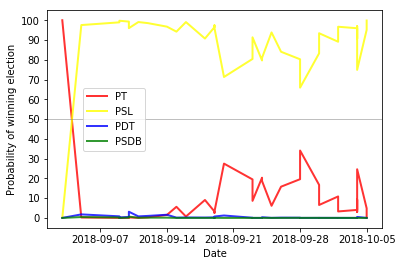

In [22]:
x=pd.to_datetime(df["Field end"])

plt.plot(x,ProbPT,linestyle='-',color='red',linewidth=2,label='PT',alpha=0.8)
plt.plot(x,ProbPSL,linestyle='-',color='yellow',linewidth=2,label='PSL',alpha=0.8)
plt.plot(x,ProbPDT,linestyle='-',color='blue',linewidth=2,label='PDT',alpha=0.8)
plt.plot(x,ProbPSDB,linestyle='-',color='green',linewidth=2,label='PSDB',alpha=0.8)

plt.legend(bbox_to_anchor=(-0.3, 0.5, 1, 0), loc='center',
           ncol=1, mode="compact", borderaxespad=0)
plt.axhline(y=50,linewidth=0.5, color = 'gray')
plt.yticks(np.arange(0,110,10))
plt.xlabel('Date')
plt.ylabel('Probability of winning election')